## Data Preprocessing

In [28]:
import pandas as pd

# Load the dataset to examine its structure and contents
file_path = 'Annual GDP.csv'
gdp_data = pd.read_csv(file_path)

# Display the first few rows and general info about the dataset
gdp_data.head(), gdp_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              24 non-null     int64  
 1   Nominal GDP prices (Ksh Million)  24 non-null     object 
 2   Annual GDP growth (%)             24 non-null     float64
 3   Real GDP prices (Ksh Million)     24 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 900.0+ bytes


(   Year Nominal GDP prices (Ksh Million)  Annual GDP growth (%)  \
 0  2023                       15,108,806                    5.6   
 1  2022                       13,489,642                    4.9   
 2  2021                       12,027,662                    7.6   
 3  2020                       10,715,070                   -0.3   
 4  2019                       10,237,727                    5.1   
 
   Real GDP prices (Ksh Million)  
 0                    10,399,980  
 1                     9,852,583  
 2                     9,395,942  
 3                     8,733,060  
 4                     8,756,946  ,
 None)

In [30]:
# Remove commas and convert the GDP columns to numeric types
gdp_data['Nominal GDP prices (Ksh Million)'] = gdp_data['Nominal GDP prices (Ksh Million)'].str.replace(',', '').astype(float)
gdp_data['Real GDP prices (Ksh Million)'] = gdp_data['Real GDP prices (Ksh Million)'].str.replace(',', '').astype(float)

# Confirm changes by displaying the updated data types and first few rows
gdp_data.head(), gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              24 non-null     int64  
 1   Nominal GDP prices (Ksh Million)  24 non-null     float64
 2   Annual GDP growth (%)             24 non-null     float64
 3   Real GDP prices (Ksh Million)     24 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 900.0 bytes


(   Year  Nominal GDP prices (Ksh Million)  Annual GDP growth (%)  \
 0  2023                        15108806.0                    5.6   
 1  2022                        13489642.0                    4.9   
 2  2021                        12027662.0                    7.6   
 3  2020                        10715070.0                   -0.3   
 4  2019                        10237727.0                    5.1   
 
    Real GDP prices (Ksh Million)  
 0                     10399980.0  
 1                      9852583.0  
 2                      9395942.0  
 3                      8733060.0  
 4                      8756946.0  ,
 None)

## visualizing trends in GDP over time

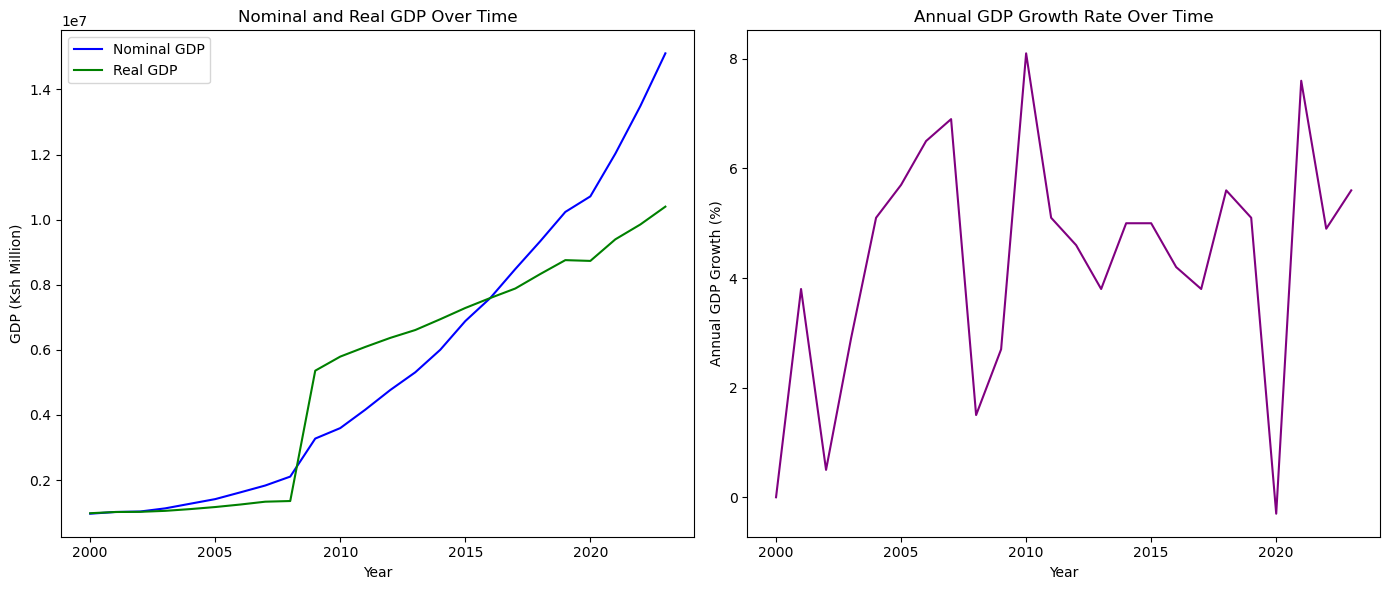

In [33]:
import matplotlib.pyplot as plt

# Set up the figure and axes for multiple plots
plt.figure(figsize=(14, 6))

# Plot Nominal and Real GDP over time
plt.subplot(1, 2, 1)
plt.plot(gdp_data['Year'], gdp_data['Nominal GDP prices (Ksh Million)'], label="Nominal GDP", color="blue")
plt.plot(gdp_data['Year'], gdp_data['Real GDP prices (Ksh Million)'], label="Real GDP", color="green")
plt.xlabel("Year")
plt.ylabel("GDP (Ksh Million)")
plt.title("Nominal and Real GDP Over Time")
plt.legend()

# Plot Annual GDP growth rate over time
plt.subplot(1, 2, 2)
plt.plot(gdp_data['Year'], gdp_data['Annual GDP growth (%)'], color="purple")
plt.xlabel("Year")
plt.ylabel("Annual GDP Growth (%)")
plt.title("Annual GDP Growth Rate Over Time")

plt.tight_layout()
plt.show()

Nominal and Real GDP Over Time: This plot shows the increasing trend in both nominal and real GDP over the years, with nominal GDP (in blue) generally higher than real GDP (in green) due to inflation.

Annual GDP Growth Rate Over Time: This plot reveals fluctuations in GDP growth. There are noticeable peaks and troughs, indicating periods of rapid economic growth and potential economic challenges.

## Feature engineering

In [37]:
# Create lagged features and moving averages for GDP data

# Add lagged features for Nominal GDP and Real GDP (previous year's GDP values)
gdp_data['Nominal GDP Lag 1'] = gdp_data['Nominal GDP prices (Ksh Million)'].shift(1)
gdp_data['Real GDP Lag 1'] = gdp_data['Real GDP prices (Ksh Million)'].shift(1)

# Add a 3-year moving average for Annual GDP Growth
gdp_data['GDP Growth 3-Year MA'] = gdp_data['Annual GDP growth (%)'].rolling(window=3).mean()

# Drop rows with NaN values (from shifting and rolling operations)
gdp_data.dropna(inplace=True)

# Display the resulting DataFrame with the new features
gdp_data.head()

,Year,Nominal GDP prices (Ksh Million),Annual GDP growth (%),Real GDP prices (Ksh Million),Nominal GDP Lag 1,Real GDP Lag 1,GDP Growth 3-Year MA
2,2021,12027662.0,7.6,9395942.0,13489642.0,9852583.0,6.033333
3,2020,10715070.0,-0.3,8733060.0,12027662.0,9395942.0,4.066667
4,2019,10237727.0,5.1,8756946.0,10715070.0,8733060.0,4.133333
5,2018,9340307.0,5.6,8330891.0,10237727.0,8756946.0,3.466667
6,2017,8483396.0,3.8,7885521.0,9340307.0,8330891.0,4.833333


In [40]:
# Import necessary libraries
import pandas as pd

# Load your dataset
gdp_data = pd.read_csv('Annual GDP.csv')

# Remove commas and convert the GDP columns to numeric types
gdp_data['Nominal GDP prices (Ksh Million)'] = gdp_data['Nominal GDP prices (Ksh Million)'].str.replace(',', '').astype(float)
gdp_data['Real GDP prices (Ksh Million)'] = gdp_data['Real GDP prices (Ksh Million)'].str.replace(',', '').astype(float)

# Add lagged features for Nominal GDP and Real GDP
gdp_data['Nominal GDP Lag 1'] = gdp_data['Nominal GDP prices (Ksh Million)'].shift(1)
gdp_data['Real GDP Lag 1'] = gdp_data['Real GDP prices (Ksh Million)'].shift(1)

# Add a 3-year moving average for Annual GDP Growth
gdp_data['GDP Growth 3-Year MA'] = gdp_data['Annual GDP growth (%)'].rolling(window=3).mean()

# Drop rows with NaN values (from shifting and rolling operations)
gdp_data.dropna(inplace=True)

# Display the resulting DataFrame to verify the new features
print(gdp_data.head())

   Year  Nominal GDP prices (Ksh Million)  Annual GDP growth (%)  \
2  2021                        12027662.0                    7.6   
3  2020                        10715070.0                   -0.3   
4  2019                        10237727.0                    5.1   
5  2018                         9340307.0                    5.6   
6  2017                         8483396.0                    3.8   

   Real GDP prices (Ksh Million)  Nominal GDP Lag 1  Real GDP Lag 1  \
2                      9395942.0         13489642.0       9852583.0   
3                      8733060.0         12027662.0       9395942.0   
4                      8756946.0         10715070.0       8733060.0   
5                      8330891.0         10237727.0       8756946.0   
6                      7885521.0          9340307.0       8330891.0   

   GDP Growth 3-Year MA  
2              6.033333  
3              4.066667  
4              4.133333  
5              3.466667  
6              4.833333  


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Define high growth as 5% or above, low growth as below 5%
gdp_data['Growth Class'] = gdp_data['Annual GDP growth (%)'].apply(lambda x: 1 if x >= 5 else 0)

# Features: using lagged Nominal GDP, Real GDP, and moving average
X = gdp_data[['Nominal GDP Lag 1', 'Real GDP Lag 1', 'GDP Growth 3-Year MA']]
y = gdp_data['Growth Class']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = dt_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



Here’s a breakdown of the metrics:

- **Precision**:
  - Class 0 ("Low Growth"): 0.75 – Good at identifying low-growth years but with some false positives.
  - Class 1 ("High Growth"): 0.33 – Higher false positive rate for high-growth years.

- **Recall**:
  - Class 0 ("Low Growth"): 0.60 – 60% of the actual low-growth years are correctly identified.
  - Class 1 ("High Growth"): 0.50 – Only half of the actual high-growth years are captured.

The accuracy of 0.57 reflects a model that has room for improvement.

## Improving the model

In [47]:
# Retrain the Decision Tree with a higher max depth
dt_model_deep = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model_deep.fit(X_train, y_train)

# Predict and evaluate with increased depth
y_pred_deep = dt_model_deep.predict(X_test)
print(classification_report(y_test, y_pred_deep))

              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.20      0.50      0.29         2

    accuracy                           0.29         7
   macro avg       0.35      0.35      0.29         7
weighted avg       0.41      0.29      0.29         7



# Moving to an MLP Model

In [56]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Standardize features for better MLP performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split standardized data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# Predict and evaluate the MLP model
y_pred_mlp = mlp_model.predict(X_test)
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.40      1.00      0.57         2

    accuracy                           0.57         7
   macro avg       0.70      0.70      0.57         7
weighted avg       0.83      0.57      0.57         7



C:\Users\ivy\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


- **Class 0 ("Low Growth")**:
  - Precision: 1.00 – Perfect precision, meaning all predicted low-growth years were correct.
  - Recall: 0.40 – Only 40% of actual low-growth years were identified.

- **Class 1 ("High Growth")**:
  - Precision: 0.40 – Less precise, with more false positives.
  - Recall: 1.00 – All actual high-growth years were correctly identified.

- **Accuracy**: 0.57 – The same as before, indicating the MLP's performance is still moderate.

## Recurrent Neural Networks (RNNs)

In [62]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare sequences for the LSTM model
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Features and target
data = gdp_data[['Nominal GDP prices (Ksh Million)', 'Real GDP prices (Ksh Million)', 'Annual GDP growth (%)']].values
seq_length = 3  # Example sequence length

# Create sequences
X_seq, y_seq = create_sequences(data, seq_length)

# Split the data into train and test sets
split_idx = int(0.7 * len(X_seq))
X_train_seq, X_test_seq = X_seq[:split_idx], X_seq[split_idx:]
y_train_seq, y_test_seq = y_seq[:split_idx], y_seq[split_idx:]

# Reshape input data to be 3D [samples, time steps, features]
X_train_seq = X_train_seq.reshape((X_train_seq.shape[0], seq_length, X_train_seq.shape[2]))
X_test_seq = X_test_seq.reshape((X_test_seq.shape[0], seq_length, X_test_seq.shape[2]))


### Build the LSTM Model

In [65]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, X_train_seq.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_seq, y_train_seq, epochs=200, validation_split=0.2, verbose=1)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 24793407553536.0000 - val_loss: 1325956333568.0000
Epoch 2/200
1/1 [==============================] - 0s 32ms/step - loss: 24312041963520.0000 - val_loss: 1287030177792.0000
Epoch 3/200
1/1 [==============================] - 0s 34ms/step - loss: 23835336245248.0000 - val_loss: 1250941075456.0000
Epoch 4/200
1/1 [==============================] - 0s 34ms/step - loss: 23372805177344.0000 - val_loss: 999447920640.0000
Epoch 5/200
1/1 [==============================] - 0s 32ms/step - loss: 22917781913600.0000 - val_loss: 967613284352.0000
Epoch 6/200
1/1 [==============================] - 0s 31ms/step - loss: 22018445541376.0000 - val_loss: 939136647168.0000
Epoch 7/200
1/1 [==============================] - 0s 32ms/step - loss: 21568935690240.0000 - val_loss: 914006278144.0000
Epoch 8/200
1/1 [==============================] - 0s 32ms/step - loss: 21966241136640.0000 - val_loss: 892254814208.0000
Epoch 9/200
1/1 [======

# Evaluate the Model:

In [68]:
# Make predictions
y_pred_seq = model.predict(X_test_seq)

# Evaluate model performance
mse = model.evaluate(X_test_seq, y_test_seq)
print(f"Mean Squared Error: {mse}")


1/1 [==============================] - 0s 20ms/step - loss: 288433045504.0000
Mean Squared Error: 288433045504.0


# Improving model
Data Normalization:

In [80]:
# Normalize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit scaler_X on features and scaler_y on target
X_scaled = scaler_X.fit_transform(data[:, :-1])
y_scaled = scaler_y.fit_transform(data[:, -1].reshape(-1, 1))

# Create sequences with normalized data
X_seq, y_seq = create_sequences(np.hstack((X_scaled, y_scaled)), seq_length)

# Split the data into train and test sets
split_idx = int(0.7 * len(X_seq))
X_train_seq, X_test_seq = X_seq[:split_idx], X_seq[split_idx:]
y_train_seq, y_test_seq = y_seq[:split_idx], y_seq[split_idx:]

# Reshape input data to be 3D [samples, time steps, features]
X_train_seq = X_train_seq.reshape((X_train_seq.shape[0], seq_length, X_train_seq.shape[2]))
X_test_seq = X_test_seq.reshape((X_test_seq.shape[0], seq_length, X_test_seq.shape[2]))

Model Initialization and Training:

In [82]:
# Redefine the LSTM model with additional layers and neurons
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(seq_length, X_train_seq.shape[2])))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model with more epochs
history = model.fit(X_train_seq, y_train_seq, epochs=500, validation_split=0.2, verbose=1)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 0.4306 - val_loss: 1.0594
Epoch 2/500
1/1 [==============================] - 0s 35ms/step - loss: 0.4027 - val_loss: 1.0708
Epoch 3/500
1/1 [==============================] - 0s 32ms/step - loss: 0.3786 - val_loss: 1.0816
Epoch 4/500
1/1 [==============================] - 0s 31ms/step - loss: 0.3568 - val_loss: 1.0919
Epoch 5/500
1/1 [==============================] - 0s 31ms/step - loss: 0.3380 - val_loss: 1.1022
Epoch 6/500
1/1 [==============================] - 0s 28ms/step - loss: 0.3207 - val_loss: 1.1131
Epoch 7/500
1/1 [==============================] - 0s 29ms/step - loss: 0.3049 - val_loss: 1.1239
Epoch 8/500
1/1 [==============================] - 0s 29ms/step - loss: 0.2903 - val_loss: 1.1344
Epoch 9/500
1/1 [==============================] - 0s 31ms/step - loss: 0.2768 - val_loss: 1.1449
Epoch 10/500
1/1 [==============================] - 0s 27ms/step - loss: 0.2642 - val_loss: 1.1553
Epoch 11/500
1/1 [===

In [84]:
# Make predictions
y_pred_seq = model.predict(X_test_seq)

# Evaluate model performance
mse = model.evaluate(X_test_seq, y_test_seq)
print(f"Mean Squared Error: {mse}")

# Inverse transform predictions to original scale
y_pred_seq_orig = scaler_y.inverse_transform(y_pred_seq)
y_test_seq_orig = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1))

# Print some of the predictions vs actual values
print("Predictions vs Actual:")
for pred, actual in zip(y_pred_seq_orig, y_test_seq_orig):
    print(f"Predicted: {pred[0]}, Actual: {actual[0]}")

1/1 [==============================] - 0s 22ms/step - loss: 2.7389
Mean Squared Error: 2.738901138305664
Predictions vs Actual:
Predicted: 5.420627593994141, Actual: 2.114491045308038
Predicted: 3.3094489574432373, Actual: 1.678900082266504
Predicted: 4.234805107116699, Actual: 5.7
Predicted: 5.395148277282715, Actual: 2.0248218887172804
Predicted: 6.237059116363525, Actual: 1.6340868939813968
Predicted: 6.94476842880249, Actual: 5.1
